## **Spam Text Message Classification:**

The purpose of this project is to categorise the given messages as spam or not spam category. In this project we will use some Natural language Processing tool to detect the spam.
Natural language processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret and manipulate human language. 


In [89]:
#Importing Libraries:

import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [90]:
#Reading the dataset:

data = pd.read_csv('/content/spam.tsv', sep = '\t')
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


Above we can see we have bunch of message with ham and spam categories.

In [91]:
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [92]:
data.isnull().sum()   #There is No Null value

label      0
message    0
length     0
punct      0
dtype: int64

In [93]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [94]:
ham = data[data['label']=='ham']
spam = data[data['label']=='spam']

In [95]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [130]:
Data = ham.append(spam,ignore_index = True)


## **WordClouds- to see which words are common in SPAM and NOT SPAM mesaages**

In [97]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
ham_words = ''
spam_words = ''

for val in data[data['label'] == 'spam'].message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in data[data['label'] == 'ham'].message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [99]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

**Spam Word cloud:**

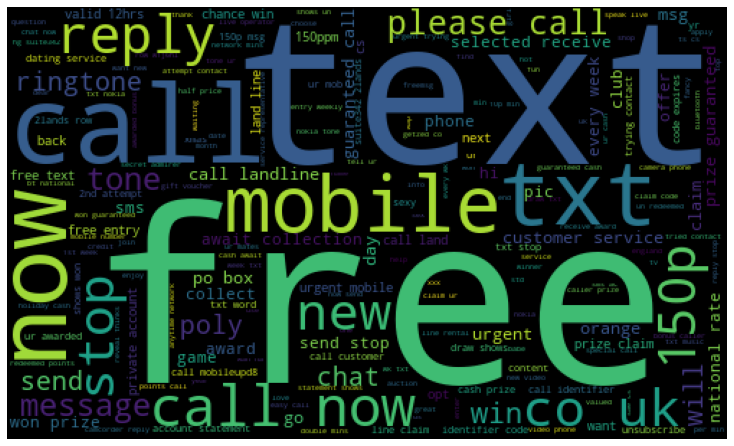

In [100]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Ham Word cloud :**

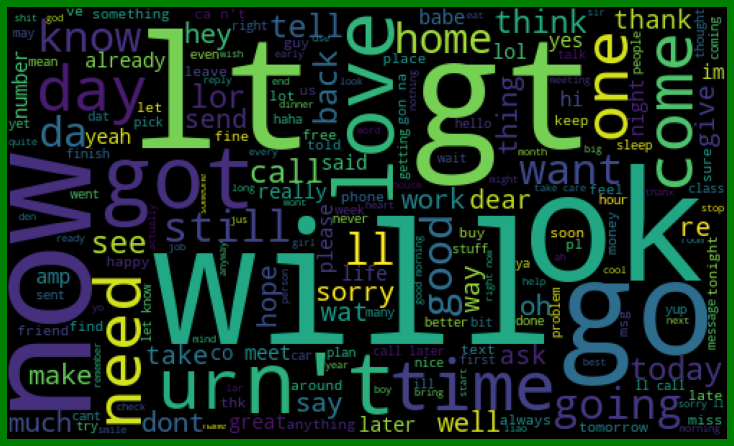

In [101]:
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Stop words:** This are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

**Removing Stopwords and Punctuations from the messages:**

In [131]:
import string
def text_process(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    message = [word for word in message.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(message)

In [132]:
Data['message'] = Data['message'].apply(text_process)

**Data after preprocessing:**

In [104]:
Data.head()

,label,message,length,punct
0,ham,Go jurong point crazy Available bugis n great ...,111,9
1,ham,Ok lar Joking wif u oni,29,6
2,ham,U dun say early hor U c already say,49,6
3,ham,Nah dont think goes usf lives around though,61,2
4,ham,Even brother like speak treat like aids patent,77,2


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

Splitting train and test dataset:

In [134]:
X_train, X_test, y_train, y_test = train_test_split(Data['message'],Data['label'], test_size=0.3, random_state=0,shuffle=True,stratify = Data['label'])

**TfidfVectorizer:** TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. 
The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

In [107]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [108]:
X_train.shape

(3900, 7611)

In [135]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators = 100,n_jobs=-1))])

In [137]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [138]:
y_pred = clf.predict(X_test)

In [145]:
CF =  confusion_matrix(y_test,y_pred)

In [150]:
CF

array([[1446,    2],
       [  51,  173]])

**Confusion Matrix:**

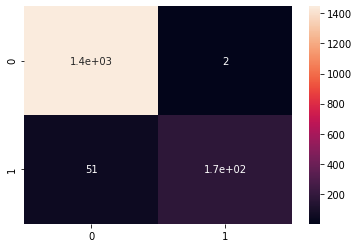

In [148]:
import seaborn as sns
sns.heatmap(CF,annot=True )

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.77      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [141]:
accuracy_score(y_test,y_pred)

0.9683014354066986

**So the Accuracy of our model is 96%**